In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

import sys
sys.path.insert(1, '../')
import data_handler
sys.path.insert(1, '../kp_match')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train, df_val, df_test = data_handler.load_full_dataset('../dataset/', get_train=True, get_dev=True, get_test=True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 3 to 3455
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   argument   4998 non-null   object
 1   key_point  4998 non-null   object
 2   topic      4998 non-null   object
 3   stance     4998 non-null   int64 
 4   label      4998 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.3+ KB


In [13]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 3 to 3423
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   argument   552 non-null    object
 1   key_point  552 non-null    object
 2   topic      552 non-null    object
 3   stance     552 non-null    int64 
 4   label      552 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 25.9+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   argument  18398 non-null  object
 1   topic     18398 non-null  object
 2   stance    18398 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 431.3+ KB


In [15]:
print(f"Number of unique topics present in Training set: {len(df_train['topic'].unique())}")
print(f"Number of unique topics present in Validation set: {len(df_val['topic'].unique())}")
print(f"Number of unique topics present in Test set: {len(df_test['topic'].unique())}")

Number of unique topics present in Training set: 28
Number of unique topics present in Validation set: 3
Number of unique topics present in Test set: 43


In [16]:
#Check if there are some shared topics
print(f"Overlap of topics between Training and Validation: {len(np.intersect1d(df_train['topic'].unique(), df_val['topic'].unique()))}")
print(f"Overlap of topics between Training and Test: {len(np.intersect1d(df_train['topic'].unique(), df_test['topic'].unique()))}")
print(f"Overlap of topics between Test and Validation: {len(np.intersect1d(df_val['topic'].unique(), df_test['topic'].unique()))}")

Overlap of topics between Training and Validation: 0
Overlap of topics between Training and Test: 0
Overlap of topics between Test and Validation: 0


In [17]:
len_kp = pd.DataFrame()
len_kp['length'] = df_train['key_point'].apply(lambda x: len(x.split(" ")))
print(f"Maximum length of key point: {len_kp.length.max()}")
print(f"Minimum length of key point: {len_kp.length.min()}")
print(f"Mean length of key point: {len_kp.length.mean()}")

Maximum length of key point: 19
Minimum length of key point: 3
Mean length of key point: 7.303721488595438


In [6]:
# Concatenate topics and keypoints, as stated in the paper
df_train = data_handler.concatenate_topics(df_train, input_col='argument', output_col='argument')
df_val = data_handler.concatenate_topics(df_val, input_col='argument', output_col='argument')
df_test = data_handler.concatenate_topics(df_test, input_col='argument', output_col='argument')

In [19]:
n_words = pd.DataFrame()
n_words['words_per_arg_train'] = df_train['argument'].str.split().apply(len)
n_words['words_per_arg_val'] = df_val['argument'].str.split().apply(len)
n_words['words_per_arg_test'] = df_test['argument'].str.split().apply(len)

<AxesSubplot: >

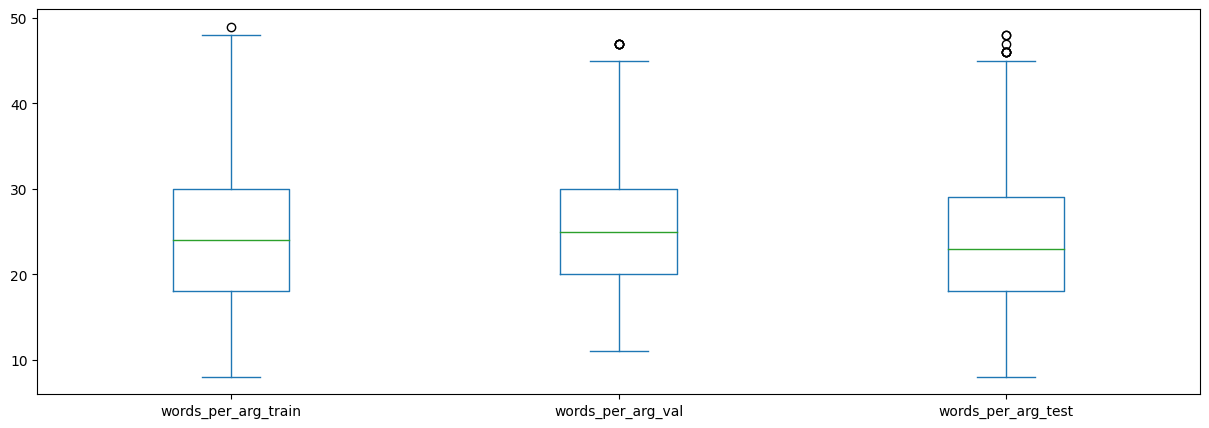

In [20]:
n_words.plot.box(figsize=(15, 5))

In [21]:
print(f"Max number of words for Training args: {n_words['words_per_arg_train'].max()}")
print(f"Max number of words for Validation args: {n_words['words_per_arg_val'].max()}")
print(f"Max number of words for Test args: {n_words['words_per_arg_test'].max()}\n")

Max number of words for Training args: 49
Max number of words for Validation args: 47.0
Max number of words for Test args: 48



In [6]:
def plot_tokens_length(model_type, data):
    
    tokenizer = AutoTokenizer.from_pretrained(model_type, do_lower_case=True)

    # Tokenizing without padding to check token lengths
    args_len = [len(tokenizer.encode(s)) for s in data['argument']]
    kps_len = [len(tokenizer.encode(s)) for s in data['key_point']]
    
    print(f'Vocabulary size of tokenizer:', tokenizer.vocab_size)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
    axes[0].hist(args_len, bins=20, color="C0", edgecolor="C0")
    axes[0].set_title("Arguments Token Length")
    axes[0].set_xlabel("Length")
    axes[0].set_ylabel("Count")

    axes[1].hist(kps_len, bins=20, color="C0", edgecolor="C0")
    axes[1].set_title("Key Points Token Length")
    axes[1].set_xlabel("Length")
    plt.tight_layout()
    plt.show()

Vocabulary size of tokenizer: 96103


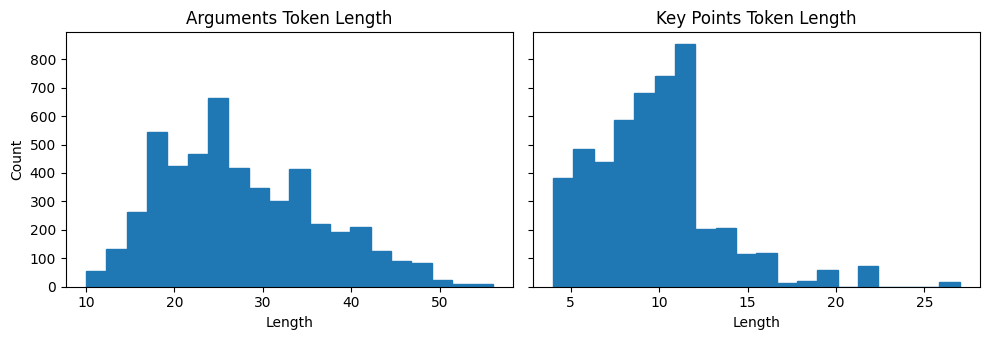

In [7]:
plot_tokens_length("google/pegasus-xsum", df_train)

Vocabulary size of tokenizer: 96103


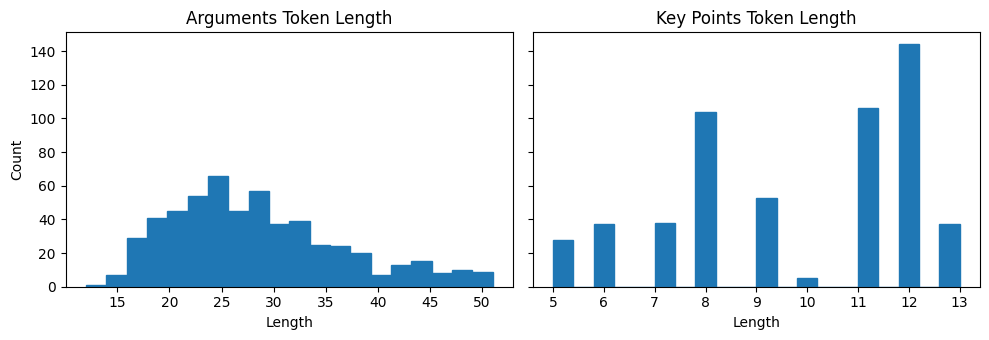

In [8]:
plot_tokens_length("google/pegasus-xsum", df_val)

Vocabulary size of tokenizer: 32100


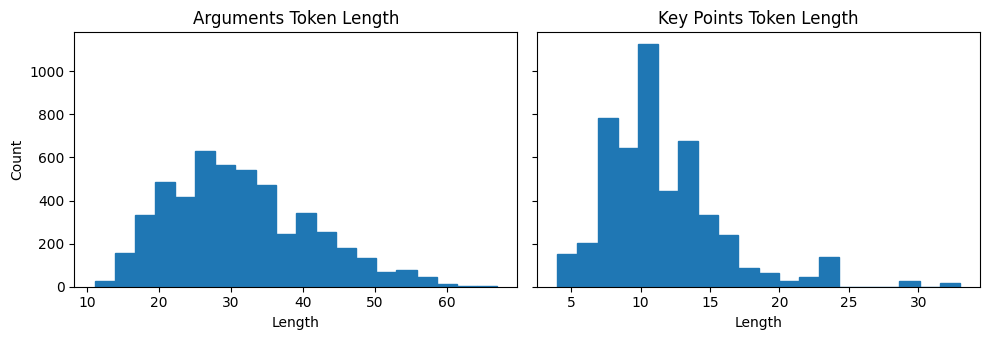

In [9]:
plot_tokens_length("t5-base", df_train)

Vocabulary size of tokenizer: 32100


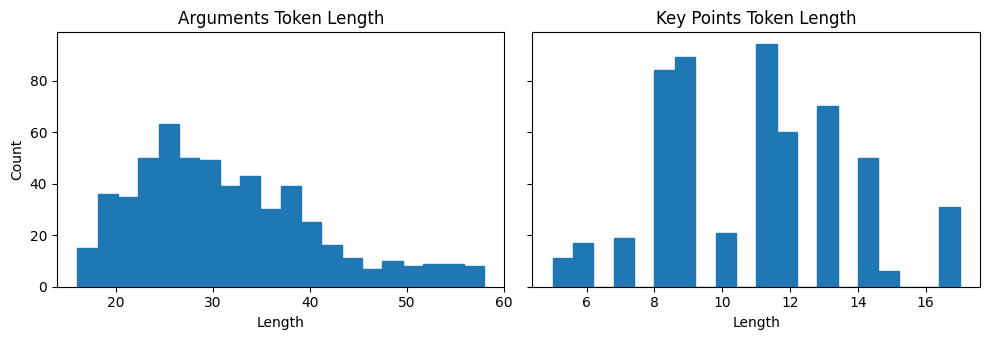

In [10]:
plot_tokens_length("t5-base", df_val)